In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('specdata20120207/benchmarks.txt', sep=",", header=None)
data.columns = ["ID", "benchName", "base", "peak"]
df = pd.DataFrame(data, columns=data.columns)
df = df.drop(df.index[0])
df.head()

,ID,benchName,base,peak
1,cpu95-19990104-03254,101.tomcatv,19.4,27.1
2,cpu95-19990104-03254,102.swim,27.2,34.8
3,cpu95-19990104-03254,103.su2cor,10.1,9.98
4,cpu95-19990104-03254,104.hydro2d,8.58,8.61
5,cpu95-19990104-03254,107.mgrid,8.94,9.44


## Data Cleaning

We will eliminate the tests for which we can't find a date in the ID. These tests are in my dataframe in rows 9372 to 9950. Then, we will select a benchmark, and eliminate all the tests that do not correspond to the benchmark we are using

In [88]:
df = df.drop(df.index[9372:9950])

In [89]:
#We drop the data that doesn't correspond to our chosen benchmark
#We find the columns to be dropped
ChosenBench = "mgrid"
c = 0
dropIndex = []
for i in df["benchName"]:
    if str(i)[4:] != ChosenBench: dropIndex.append(c)
    c+=1
#drop columns
df = df.drop(df.index[dropIndex])
df.head()

,ID,benchName,base,peak
5,cpu95-19990104-03254,107.mgrid,8.94,9.44
31,cpu95-19990118-03258,107.mgrid,8.81,9.52
49,cpu95-19990122-03281,107.mgrid,24.4,24.4
59,cpu95-19990122-03282,107.mgrid,44.4,44.1
69,cpu95-19990122-03283,107.mgrid,87.0,85.1


In [90]:
#Isolate date. For simplicity, we will just use the year. 
ID = np.asarray(df["ID"])
Year = []

for ThisID in ID:
    #Find the year after the first "-"
    for i in range(len(ThisID)):
        if ThisID[i] == "-": 
            #Some people wrote years before 2000 without the "19". For example, 96 instead of 1996
            if ThisID[i+1]=='9':
                ThisYear = float('19' + ThisID[i+1:i+3]) + 1.0/12*float(ThisID[i+3:i+5]) 
                Year.append(ThisYear)
                break
            else:
                ThisYear =float(ThisID[i+1:i+5]) + 1.0/12*float(ThisID[i+5:i+7]) 
                Year.append(ThisYear)
                break



In [91]:
base = np.asarray(df["base"])
base = [float(numeric_string) for numeric_string in base]

print len(Year)
print len(base)

1927
1927


## Data Analysis

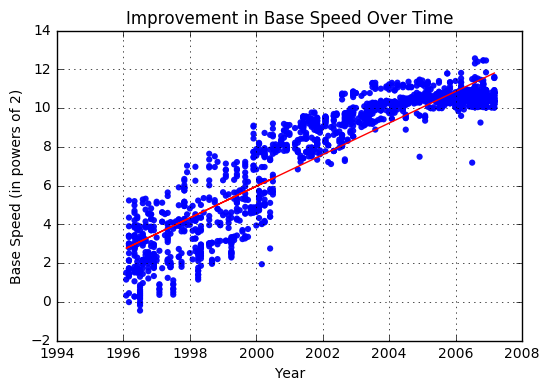

r:  0.919084922675
std_err:  0.00796926244866
0.815506289191


In [92]:
from scipy.stats import linregress

fig = plt.figure()
logBase = np.log2(base)
slope, intercept, r_value, p_value, std_err = linregress(Year, logBase)
ax=plt.gca() 
ax.scatter(Year,logBase,c="blue",alpha=0.95,edgecolors='none', label='data')
plt.title('Improvement in Base Speed Over Time')
plt.xlabel('Year')
plt.ylabel('Base Speed (in powers of 2)')
polynomial = np.poly1d([slope,intercept])
plt.grid(True)
line = polynomial(Year)
plt.plot(Year, line, c="red")

plt.show()

print "r: ",r_value
print "std_err: ",std_err
print slope



## Only one benchmark

In [93]:
#We drop the data that doesn't correspond to our chosen benchmark
#We find the columns to be dropped
ChosenBench = "107.mgrid"
c = 0
dropIndex = []
for i in df["benchName"]:
    if i != ChosenBench: dropIndex.append(c)
    c+=1
#drop columns
df = df.drop(df.index[dropIndex])
df.head()

,ID,benchName,base,peak
5,cpu95-19990104-03254,107.mgrid,8.94,9.44
31,cpu95-19990118-03258,107.mgrid,8.81,9.52
49,cpu95-19990122-03281,107.mgrid,24.4,24.4
59,cpu95-19990122-03282,107.mgrid,44.4,44.1
69,cpu95-19990122-03283,107.mgrid,87.0,85.1


In [94]:
#Isolate date. For simplicity, we will just use the year. 
ID = np.asarray(df["ID"])
Year = []

for ThisID in ID:
    #Find the year after the first "-"
    for i in range(len(ThisID)):
        if ThisID[i] == "-": 
            #Some people wrote years before 2000 without the "19". For example, 96 instead of 1996
            if ThisID[i+1]=='9':
                ThisYear = float('19' + ThisID[i+1:i+3]) + 1.0/12*float(ThisID[i+3:i+5]) 
                Year.append(ThisYear)
                break
            else:
                ThisYear =float(ThisID[i+1:i+5]) + 1.0/12*float(ThisID[i+5:i+7]) 
                Year.append(ThisYear)
                break


In [95]:
base = np.asarray(df["base"])
base = [float(numeric_string) for numeric_string in base]

print len(Year)
print len(base)

542
542


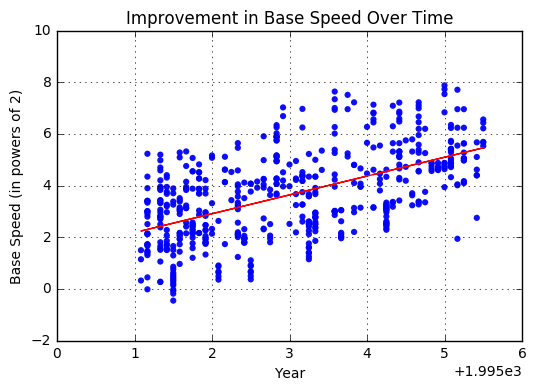

r:  0.567835730068
std_err:  0.0454646579793
0.728817541398


In [96]:
from scipy.stats import linregress


fig = plt.figure()
logBase = np.log2(base)
slope, intercept, r_value, p_value, std_err = linregress(Year, logBase)

ax=plt.gca() 
ax.scatter(Year,logBase,c="blue",alpha=0.95,edgecolors='none', label='data')
plt.title('Improvement in Base Speed Over Time')
plt.xlabel('Year')
plt.ylabel('Base Speed (in powers of 2)')
polynomial = np.poly1d([slope,intercept])
plt.grid(True)
line = polynomial(Year)
plt.plot(Year, line, c="red")

plt.show()

print "r: ",r_value
print "std_err: ",std_err
print slope